In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Función para eliminar los valores erroneos de los datos

In [76]:
def limpiar_valores_erroneos(df: pd.DataFrame) -> pd.DataFrame:
    df = df.reset_index(drop=True)

    for i, row in df.iterrows():
        for valor in range(len(row)):
            if 'N' == row.iloc[valor]:
                if valor < 10:
                    row.iloc[valor - 1] = row.iloc[valor + 1]
                    row.iloc[valor] = 'V'
                else:
                    row.iloc[valor - 1] = row.iloc[valor - 3]
                    row.iloc[valor] = 'V'

        df.loc[i] = row
        
    return df


In [77]:
def limpiar_valores_disparados(df: pd.DataFrame) -> pd.DataFrame:
    df = df.reset_index(drop=True)

    for i, row in df.iterrows():
        for valor in range(len(row)):
            if 2.0 < row.iloc[valor]:
                row.iloc[valor - 1] = row.iloc[valor - 3]

        df.loc[i] = row
        
    return df

In [78]:
def limpiar_columnas_validador(df: pd.DataFrame) -> pd.DataFrame:
    for titulos in df:
        if titulos.startswith('V'):
            df = df.drop(titulos, axis=1)

    return df

Leo los datos y los almaceno en dataframes

In [79]:
df2022 = pd.read_csv('../data/datos202212.csv', sep=';')
df2021 = pd.read_csv('../data/datos202112.csv', sep=';')
df2020 = pd.read_csv('../data/datos202012.csv', sep=';')
df2019 = pd.read_csv('../data/datos201912.csv', sep=';')
df2018 = pd.read_csv('../data/datos201812.csv', sep=';')

Guardo los datos de 2022 de la estación 56 que corresponde a la estación de la Plaza Eliptica

In [80]:
df2022_56 = df2022[df2022['ESTACION'] == 56]
df2021_56 = df2021[df2021['ESTACION'] == 56]
df2020_56 = df2020[df2020['ESTACION'] == 56]
df2019_56 = df2019[df2019['ESTACION'] == 56]
df2018_56 = df2018[df2018['ESTACION'] == 56]

df2019_56

,PROVINCIA,MUNICIPIO,ESTACION,MAGNITUD,PUNTO_MUESTREO,ANO,MES,D01,V01,D02,...,D27,V27,D28,V28,D29,V29,D30,V30,D31,V31
1524,28,79,56,6,28079056_6_48,2019,1,0.6,V,0.8,...,0.3,V,0.2,V,0.2,V,0.3,V,0.2,V
1525,28,79,56,6,28079056_6_48,2019,2,0.2,V,0.3,...,0.6,V,0.6,V,0.0,N,0.0,N,0.0,N
1526,28,79,56,6,28079056_6_48,2019,3,0.5,V,0.5,...,0.4,V,0.5,V,0.4,V,0.4,V,0.3,V
1527,28,79,56,6,28079056_6_48,2019,4,0.4,V,0.3,...,0.4,V,0.3,V,0.3,V,0.3,V,0.0,N
1528,28,79,56,6,28079056_6_48,2019,5,0.2,V,0.2,...,0.2,V,0.2,V,0.2,V,0.2,V,0.2,V
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1603,28,79,56,14,28079056_14_6,2019,8,62.0,V,52.0,...,53.0,V,65.0,N,46.0,V,55.0,V,50.0,V
1604,28,79,56,14,28079056_14_6,2019,9,44.0,V,57.0,...,28.0,V,35.0,V,38.0,V,27.0,V,0.0,N
1605,28,79,56,14,28079056_14_6,2019,10,33.0,V,59.0,...,17.0,V,19.0,V,10.0,V,20.0,V,33.0,V
1606,28,79,56,14,28079056_14_6,2019,11,34.0,V,52.0,...,54.0,V,44.0,V,39.0,V,47.0,V,0.0,N


Limpio los valores erroneos de cada dataframe

In [81]:
df2022_56 = limpiar_valores_erroneos(df2022_56)
df2021_56 = limpiar_valores_erroneos(df2021_56)
df2020_56 = limpiar_valores_erroneos(df2020_56)
df2019_56 = limpiar_valores_erroneos(df2019_56)
df2018_56 = limpiar_valores_erroneos(df2018_56)

Ahora elimino las columnas de los validadores que no son ya necesarias

In [82]:
df2022_56 = limpiar_columnas_validador(df2022_56)
df2021_56 = limpiar_columnas_validador(df2021_56)
df2020_56 = limpiar_columnas_validador(df2020_56)
df2019_56 = limpiar_columnas_validador(df2019_56)
df2018_56 = limpiar_columnas_validador(df2018_56)

In [83]:
# df2022_56 = limpiar_valores_disparados(df2022_56)
# df2021_56 = limpiar_valores_disparados(df2021_56)
# df2020_56 = limpiar_valores_disparados(df2020_56)
# df2019_56 = limpiar_valores_disparados(df2019_56)
# df2018_56 = limpiar_valores_disparados(df2018_56)

Vamos a ver los datos que guarda esta estación

In [84]:
df2022_56['MAGNITUD'].unique()

array([ 6,  7,  8,  9, 10, 12], dtype=int64)

Observamos que los números corresponden a:
06    Monóxido de Carbono    CO 
07    Monóxido de Nitrógeno    NO
08    Dióxido de Nitrógeno    NO2
09    Partículas < 2.5 μm    PM2.5  
10    Partículas < 10 μm    PM10

Si los valores superaran los siguientes valores se considera una mala calidad del aire:

PM10  Media anual.	40 μg/m3, Media diaria.	50 μg/m3	 35 días/año
PM2,5	Media anual.	25 μg/m3	 
NO2  	Media anual.	40 μg/m3 Media horaria.	200 μg/m3	18 horas/año Umbral de alerta (3 horas consecutivas en área representativa de 100 km o zona o aglomeración entera).	400 μg/m3	 	 
CO	Máxima diaria de las medias móviles octohorarias.	10 mg/m3	  


Borramos columnas innecesarias

In [85]:
df2022_56 = df2022_56.drop(["PROVINCIA", "MUNICIPIO", "ESTACION", "PUNTO_MUESTREO"], axis=1)
df2021_56 = df2021_56.drop(["PROVINCIA", "MUNICIPIO", "ESTACION", "PUNTO_MUESTREO"], axis=1)
df2020_56 = df2020_56.drop(["PROVINCIA", "MUNICIPIO", "ESTACION", "PUNTO_MUESTREO"], axis=1)
df2019_56 = df2019_56.drop(["PROVINCIA", "MUNICIPIO", "ESTACION", "PUNTO_MUESTREO"], axis=1)
df2018_56 = df2018_56.drop(["PROVINCIA", "MUNICIPIO", "ESTACION", "PUNTO_MUESTREO"], axis=1)

Separo cada magnitud en un dataframe diferente

In [86]:
df2022_56_monoxido_carbono = df2022_56[df2022_56['MAGNITUD'] == 6]
df2022_56_monoxido_nitrogeno = df2022_56[df2022_56['MAGNITUD'] == 7]
df2022_56_dioxido_nitrogeno = df2022_56[df2022_56['MAGNITUD'] == 8]
df2022_56_pm_25 = df2022_56[df2022_56['MAGNITUD'] == 9]
df2022_56_pm_10 = df2022_56[df2022_56['MAGNITUD'] == 10]
df2022_56_oxidos_nitrogeno = df2022_56[df2022_56['MAGNITUD'] == 12]

In [87]:
df2021_56_monoxido_carbono = df2021_56[df2021_56['MAGNITUD'] == 6]
df2021_56_monoxido_nitrogeno = df2021_56[df2021_56['MAGNITUD'] == 7]
df2021_56_dioxido_nitrogeno = df2021_56[df2021_56['MAGNITUD'] == 8]
df2021_56_pm_25 = df2021_56[df2021_56['MAGNITUD'] == 9]
df2021_56_pm_10 = df2021_56[df2021_56['MAGNITUD'] == 10]
df2021_56_oxidos_nitrogeno = df2021_56[df2021_56['MAGNITUD'] == 12]

In [88]:
df2020_56_monoxido_carbono = df2020_56[df2020_56['MAGNITUD'] == 6]
df2020_56_monoxido_nitrogeno = df2020_56[df2020_56['MAGNITUD'] == 7]
df2020_56_dioxido_nitrogeno = df2020_56[df2020_56['MAGNITUD'] == 8]
df2020_56_pm_25 = df2020_56[df2020_56['MAGNITUD'] == 9]
df2020_56_pm_10 = df2020_56[df2020_56['MAGNITUD'] == 10]
df2020_56_oxidos_nitrogeno = df2020_56[df2020_56['MAGNITUD'] == 12]

In [89]:
df2019_56_monoxido_carbono = df2019_56[df2019_56['MAGNITUD'] == 6]
df2019_56_monoxido_nitrogeno = df2019_56[df2019_56['MAGNITUD'] == 7]
df2019_56_dioxido_nitrogeno = df2019_56[df2019_56['MAGNITUD'] == 8]
df2019_56_pm_25 = df2019_56[df2019_56['MAGNITUD'] == 9]
df2019_56_pm_10 = df2019_56[df2019_56['MAGNITUD'] == 10]
df2019_56_oxidos_nitrogeno = df2019_56[df2019_56['MAGNITUD'] == 12]

df2019_56_monoxido_carbono

,MAGNITUD,ANO,MES,D01,D02,D03,D04,D05,D06,D07,...,D22,D23,D24,D25,D26,D27,D28,D29,D30,D31
0,6,2019,1,0.6,0.8,0.8,0.9,0.8,0.9,0.8,...,0.5,0.2,0.4,0.5,0.5,0.3,0.2,0.2,0.3,0.2
1,6,2019,2,0.2,0.3,0.4,0.6,0.7,0.7,0.7,...,0.6,0.6,0.5,0.6,0.7,0.6,0.6,0.6,0.6,0.6
2,6,2019,3,0.5,0.5,0.3,0.2,0.3,0.2,0.3,...,0.4,0.3,0.4,0.3,0.3,0.4,0.5,0.4,0.4,0.3
3,6,2019,4,0.4,0.3,0.3,0.3,0.3,0.3,0.3,...,0.3,0.2,0.2,0.2,0.2,0.4,0.3,0.3,0.3,0.3
4,6,2019,5,0.2,0.2,0.2,0.2,0.2,0.2,0.2,...,0.2,0.3,0.2,0.1,0.1,0.2,0.2,0.2,0.2,0.2
5,6,2019,6,0.2,0.1,0.2,0.2,0.1,0.1,0.1,...,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1
6,6,2019,7,0.3,0.3,0.2,0.2,0.2,0.2,0.2,...,0.2,0.2,0.2,0.3,0.2,0.2,0.2,0.2,0.2,0.2
7,6,2019,8,0.2,0.3,0.3,0.2,0.2,0.2,0.2,...,0.3,0.3,0.3,0.2,0.2,0.3,0.3,0.4,0.3,0.3
8,6,2019,9,0.3,0.2,0.2,0.3,0.2,0.2,0.2,...,0.1,0.4,0.3,0.2,0.4,0.4,0.4,0.3,0.4,0.4
9,6,2019,10,0.2,0.2,0.3,0.4,0.3,0.2,0.5,...,0.2,0.2,0.2,0.5,0.5,0.4,0.5,0.8,0.5,0.3


In [90]:
df2018_56_monoxido_carbono = df2018_56[df2018_56['MAGNITUD'] == 6]
df2018_56_monoxido_nitrogeno = df2018_56[df2018_56['MAGNITUD'] == 7]
df2018_56_dioxido_nitrogeno = df2018_56[df2018_56['MAGNITUD'] == 8]
df2018_56_pm_25 = df2018_56[df2018_56['MAGNITUD'] == 9]
df2018_56_pm_10 = df2018_56[df2018_56['MAGNITUD'] == 10]
df2018_56_oxidos_nitrogeno = df2018_56[df2018_56['MAGNITUD'] == 12]

In [91]:

print(df2018_56_monoxido_carbono)


    MAGNITUD   ANO  MES  D01  D02  D03  D04  D05  D06  D07  ...  D22  D23  \
0          6  2018    1  0.2  0.3  0.4  0.3  0.2  0.3  0.3  ...  0.7  0.7   
1          6  2018    2  0.5  0.4  0.4  0.3  0.4  0.4  0.4  ...  0.4  0.5   
2          6  2018    3  0.2  0.4  0.2  0.2  0.2  0.3  0.3  ...  0.3  0.3   
3          6  2018    4  0.3  0.3  0.2  0.2  0.4  0.4  0.2  ...  0.3  0.4   
4          6  2018    5  0.2  0.2  0.3  0.2  0.2  0.2  0.3  ...  0.3  0.2   
5          6  2018    6  0.2  0.1  0.1  0.1  0.1  0.1  0.2  ...  0.2  0.1   
6          6  2018    7  0.1  0.2  0.4  0.3  0.2  0.2  0.2  ...  0.4  0.4   
7          6  2018    8  0.5  0.6  0.5  0.4  0.4  0.5  0.4  ...  0.4  0.5   
8          6  2018    9  0.5  0.5  0.5  0.5  0.4  0.5  0.5  ...  0.5  0.5   
9          6  2018   10  0.4  0.6  0.7  0.7  0.8  0.6  0.4  ...  0.7  0.7   
10         6  2018   11  0.4  0.3  0.5  0.4  0.3  0.2  0.4  ...  0.4  0.3   
11         6  2018   12  0.6  0.6  0.5  0.8  0.9  0.8  0.6  ...  0.4  0.4   

Ahora voy a guardar todos los meses en una sola fila. Y luego ir metiendo cada años en cada fila

In [92]:
def pasar_datos_a_fila(df: pd.DataFrame) -> pd.DataFrame:
    df = df.drop(["MAGNITUD", "ANO"], axis=1)

    fila1 = df.iloc[0]
    fila2 = df.iloc[1]
    fila3 = df.iloc[2]
    fila4 = df.iloc[3]
    fila5 = df.iloc[4]
    fila6 = df.iloc[5]
    fila7 = df.iloc[6]
    fila8 = df.iloc[7]
    fila9 = df.iloc[8]
    fila10 = df.iloc[9]
    fila11 = df.iloc[10]
    fila12 = df.iloc[11]
    nuevo_df = pd.concat([fila1, fila2, fila3, fila4, fila5, fila6, fila7, fila8, fila9, fila10, fila11, fila12]).to_frame().T.reset_index(drop=True)
    nuevo_df = nuevo_df.drop("MES", axis=1)

    nuevo_df.columns = range(1, len(nuevo_df.columns) + 1)

    return nuevo_df

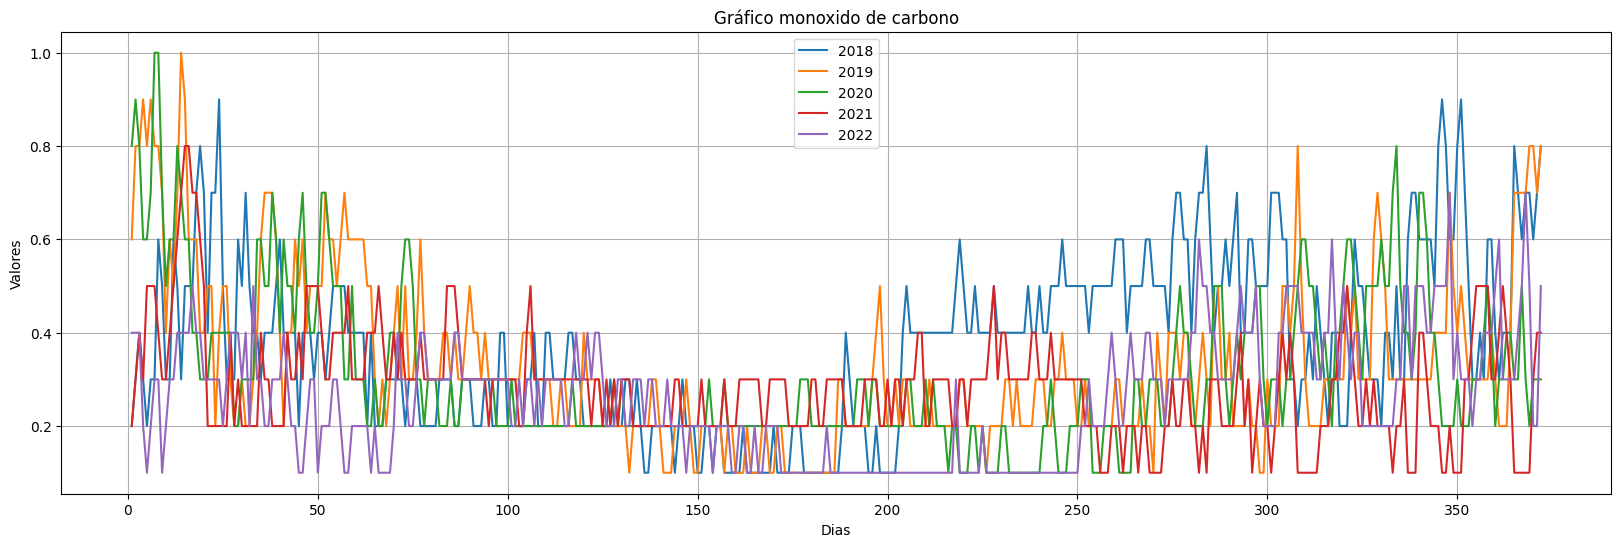

In [96]:
nuevo_df1 = pasar_datos_a_fila(df2018_56_monoxido_carbono)
nuevo_df2 = pasar_datos_a_fila(df2019_56_monoxido_carbono)
nuevo_df3 = pasar_datos_a_fila(df2020_56_monoxido_carbono)
nuevo_df4 = pasar_datos_a_fila(df2021_56_monoxido_carbono)
nuevo_df5 = pasar_datos_a_fila(df2022_56_monoxido_carbono)

nuevo_df1 = pd.concat([nuevo_df1, nuevo_df2, nuevo_df3, nuevo_df4, nuevo_df5], ignore_index=True)

# Crear un gráfico de líneas
plt.figure(figsize=(20, 6))

for i, fila in nuevo_df1.iterrows():
    plt.plot(fila, label=f'{i + 2018}')

# Configurar el gráfico
plt.title('Gráfico monoxido de carbono')
plt.xlabel('Dias')
plt.ylabel('Valores')
plt.legend()
plt.grid(True)
plt.show()